# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [6]:
#your code here
salaries = pd.read_csv('./hw1_csv/Salaries.csv')
teams = pd.read_csv('./hw1_csv/Teams.csv')
salaries.head()
# teams.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [11]:
help(salaries.groupby)

Help on method groupby in module pandas.core.generic:

groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns.
    
    Parameters
    ----------
    by : mapping, function, str, or iterable
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine the groups. A str or list of strs
        may be passed to group by the columns in ``self``
    axis : int, default 0
    level : int, level name, or sequence of such, default None
    

In [14]:
salariesbyyear = salaries.groupby(['yearID'] ).sum()
# salariesbyyear = salariesbyyear[["yearID","teamID","salary"]]
salariesbyyear.head()

,salary
yearID,
1985,261964696
1986,307854518
1987,272575375
1988,300452424
1989,359995711


In [15]:
#your code here
salariesbyyear = salaries.groupby(['yearID','teamID'] , as_index=False).sum()
salariesbyyear = salariesbyyear[["yearID","teamID","salary"]]
salariesbyyear.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [16]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [16]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [17]:
teams = teams[["yearID","teamID","W"]]
teams.head()

,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [34]:
salariesbyyear.head()
# teams.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


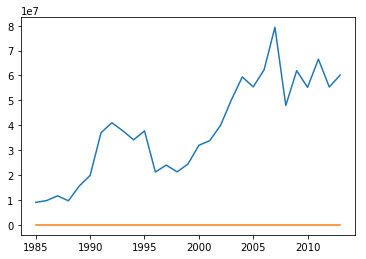

In [18]:
#your code here
teamWin = pd.merge(salariesbyyear, teams, on=["yearID","teamID"])
teamWin.head()
oak = teamWin[teamWin["teamID"] == "OAK"]
oak.head()
oakSalary = oak[["yearID","salary"]]
plt.figure()
plt.plot(oakSalary["yearID"], oakSalary["salary"])
plt.plot(oak["yearID"], oak["W"])


In [32]:
teamWin.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [29]:
#your code here
oak.head()
oak.yearID.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013])

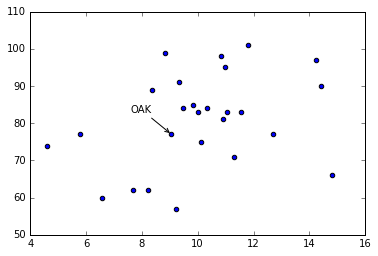

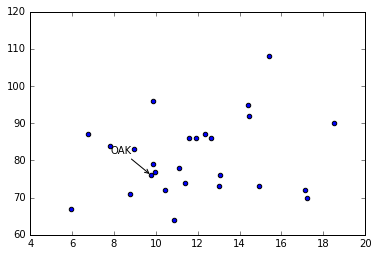

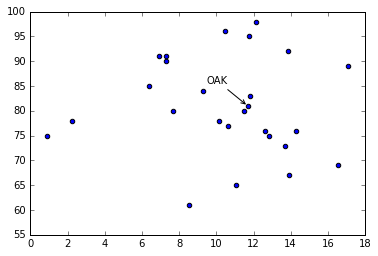

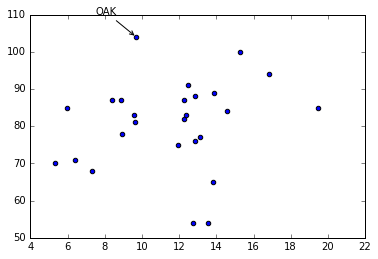

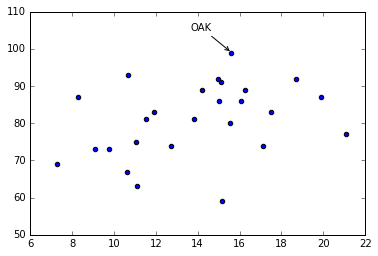

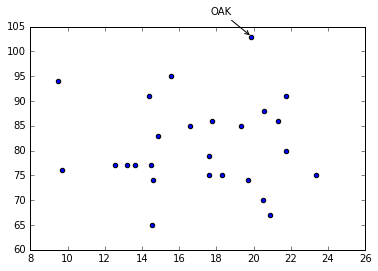

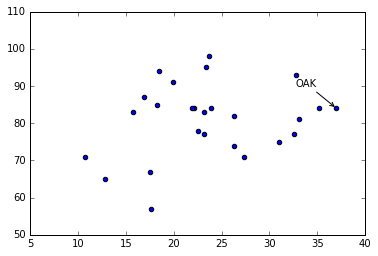

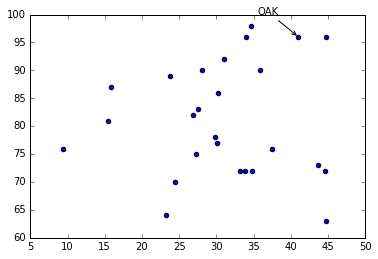

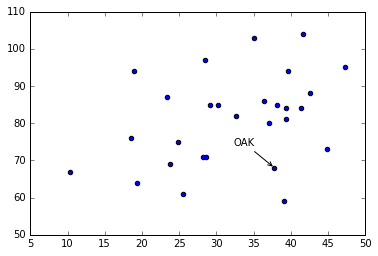

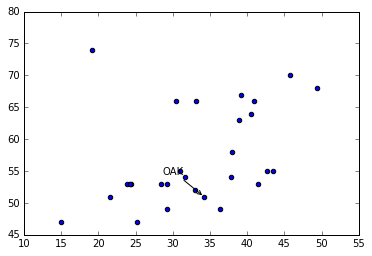

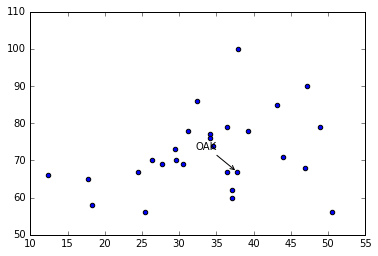

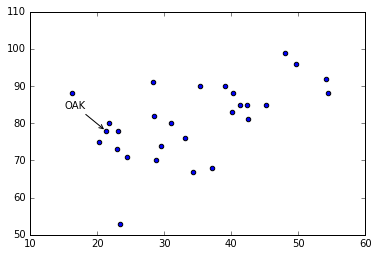

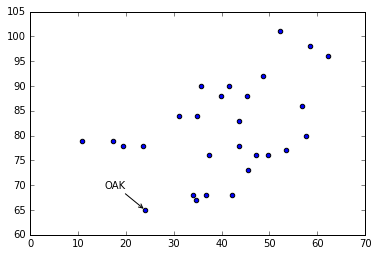

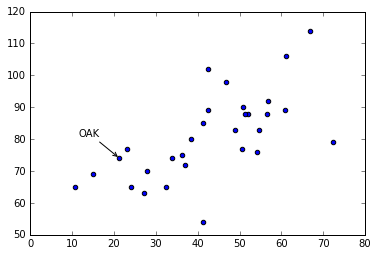

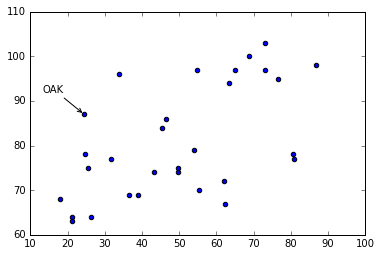

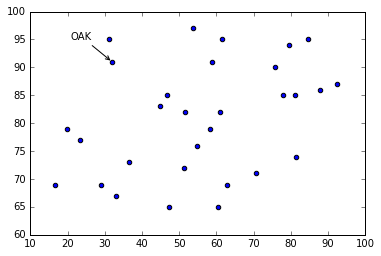

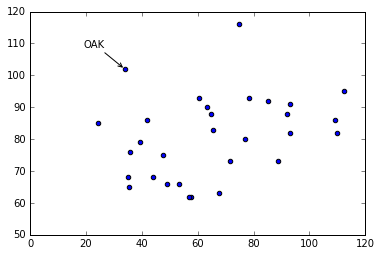

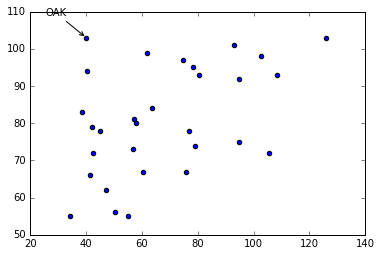

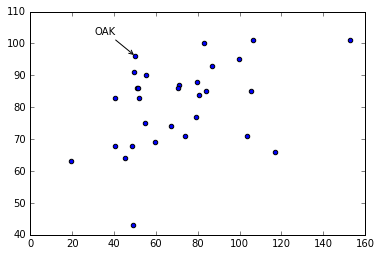

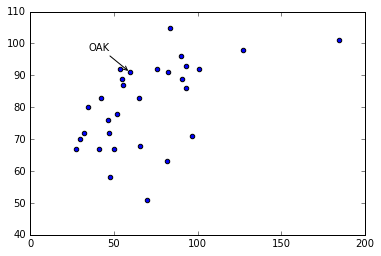

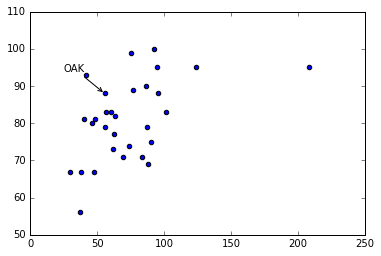

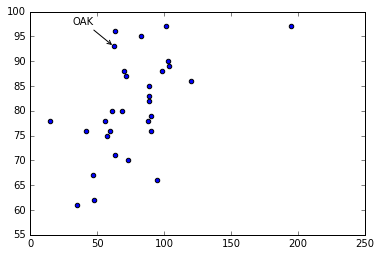

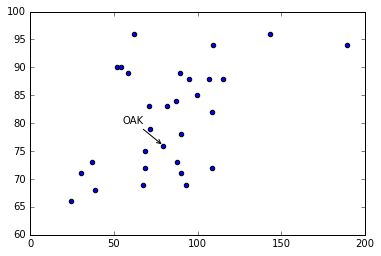

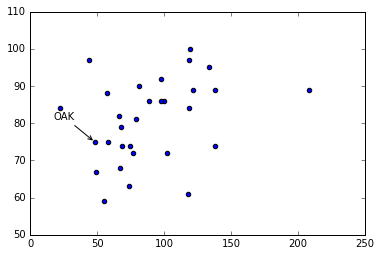

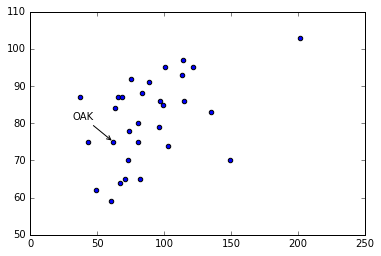

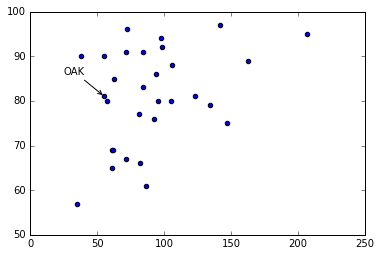

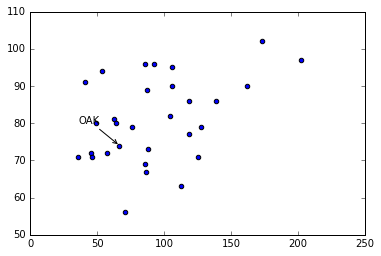

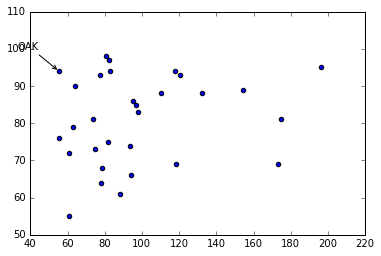

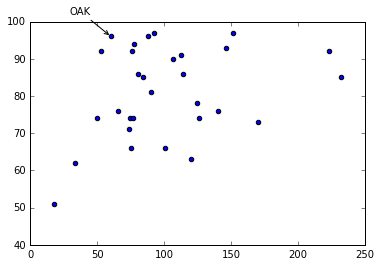

In [39]:
years = oak.yearID.unique()
for i in years:
    df = teamWin[teamWin['yearID'] == i]
    plt.scatter(df['salary'] / 1e6, df['W'])
    plt.annotate("OAK",
                 xy = (df['salary'][df['teamID'] == "OAK"] / 1e6,  df['W'][df['teamID'] == "OAK"]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [5]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [11]:
#your code here
url = "./../2014_data/countries.csv"
countries = pd.read_csv(url)
print(countries.head())

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [12]:
#your code here
url = "./data/hw1/indicator gapminder gdp_per_capita_ppp.xlsx"
income = pd.read_excel(url)
print(income)
income = income.set_index("GDP per capita").T
print(income)

               GDP per capita    1800    1801    1802    1803    1804    1805  \
0                    Abkhazia     NaN     NaN     NaN     NaN     NaN     NaN   
1                 Afghanistan   603.0   603.0   603.0   603.0   603.0   603.0   
2       Akrotiri and Dhekelia     NaN     NaN     NaN     NaN     NaN     NaN   
3                     Albania   667.0   667.0   668.0   668.0   668.0   668.0   
4                     Algeria   716.0   716.0   717.0   718.0   719.0   720.0   
5              American Samoa     NaN     NaN     NaN     NaN     NaN     NaN   
6                     Andorra  1197.0  1199.0  1201.0  1204.0  1206.0  1208.0   
7                      Angola   618.0   620.0   623.0   626.0   628.0   631.0   
8                    Anguilla     NaN     NaN     NaN     NaN     NaN     NaN   
9         Antigua and Barbuda   757.0   757.0   757.0   757.0   757.0   757.0   
10                  Argentina  1507.0  1508.0  1508.0  1508.0  1508.0  1508.0   
11                    Armeni

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [13]:
income = income.reset_index()

In [14]:
income.columns.values[0] = "year"
income.head()

GDP per capita,year,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
0,1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1,1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
2,1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
3,1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
4,1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [108]:
del income.index.name

In [15]:
income = income.set_index("year")

In [16]:
del income.index.name

In [17]:
income.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [9]:
#your code here


#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [ ]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

In [ ]:
teamWin = pd.merge(salariesbyyear, teams, on=["yearID","teamID"])

In [18]:
income.loc[1800]

GDP per capita
Abkhazia                       NaN
Afghanistan                  603.0
Akrotiri and Dhekelia          NaN
Albania                      667.0
Algeria                      716.0
American Samoa                 NaN
Andorra                     1197.0
Angola                       618.0
Anguilla                       NaN
Antigua and Barbuda          757.0
Argentina                   1507.0
Armenia                      514.0
Aruba                        833.0
Australia                    815.0
Austria                     1848.0
Azerbaijan                   775.0
Bahamas                     1445.0
Bahrain                     1235.0
Bangladesh                   876.0
Barbados                     913.0
Belarus                      608.0
Belgium                     2412.0
Belize                       579.0
Benin                        597.0
Bermuda                     1227.0
Bhutan                       629.0
Bolivia                      854.0
Bosnia and Herzegovina       669.0
Botsw

In [19]:
gdpByYear = income.loc[2000]
len(gdpByYear)

262

In [23]:
income.ix[1801]

GDP per capita
Abkhazia                       NaN
Afghanistan                  603.0
Akrotiri and Dhekelia          NaN
Albania                      667.0
Algeria                      716.0
American Samoa                 NaN
Andorra                     1199.0
Angola                       620.0
Anguilla                       NaN
Antigua and Barbuda          757.0
Argentina                   1508.0
Armenia                      514.0
Aruba                        833.0
Australia                    816.0
Austria                     1855.0
Azerbaijan                   775.0
Bahamas                     1445.0
Bahrain                     1240.0
Bangladesh                   876.0
Barbados                     914.0
Belarus                      608.0
Belgium                     2413.0
Belize                       579.0
Benin                        597.0
Bermuda                     1227.0
Bhutan                       629.0
Bolivia                      854.0
Bosnia and Herzegovina       669.0
Botsw

In [24]:
data = pd.DataFrame(income.ix[1800].values, columns = ['Income'])
data['Country'] = income.columns
data.head()

,Income,Country
0,NaN,Abkhazia
1,603.0,Afghanistan
2,NaN,Akrotiri and Dhekelia
3,667.0,Albania
4,716.0,Algeria


In [136]:
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [25]:
def mergeByYear(year):
    data = pd.DataFrame(income.ix[year].values, columns = ['Income'])
    data['Country'] = income.columns
    newIncome = pd.merge(data, countries, on=["Country", "Country"])
    return newIncome
mergeByYear(2012)

,Income,Country,Region
0,1893.0,Afghanistan,ASIA
1,9811.0,Albania,EUROPE
2,12779.0,Algeria,AFRICA
3,41926.0,Andorra,EUROPE
4,7230.0,Angola,AFRICA
5,20577.0,Antigua and Barbuda,NORTH AMERICA
6,17101.0,Argentina,SOUTH AMERICA
7,7291.0,Armenia,EUROPE
8,42522.0,Australia,OCEANIA
9,44216.0,Austria,EUROPE


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [11]:
#your code here

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [157]:
from scipy.stats import norm
def ratioNormals(diff, a):
    avgX = diff
    avgY = 0
    cdfX = norm.cdf(a, loc=diff, scale=1)
    cdfY = norm.cdf(a, loc=0, scale=1)
    ratio = (1 - cdfX)/(1 - cdfY)
    return ratio

ratioNormals(1, 2)

6.9738168680887558

In [ ]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

In [13]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [78]:
income2012.groupby(["Region"]).mean()

,Income,greater1000
Region,,
AFRICA,5601.220000,0.880000
ASIA,23500.432432,1.000000
EUROPE,30492.720930,0.977273
NORTH AMERICA,16036.650000,1.000000
OCEANIA,10481.153846,1.000000
SOUTH AMERICA,13015.750000,1.000000


In [84]:
print(mergeByYear(2012).groupby("Region").head())

      Income              Country         Region
0     1893.0          Afghanistan           ASIA
1     9811.0              Albania         EUROPE
2    12779.0              Algeria         AFRICA
3    41926.0              Andorra         EUROPE
4     7230.0               Angola         AFRICA
5    20577.0  Antigua and Barbuda  NORTH AMERICA
6    17101.0            Argentina  SOUTH AMERICA
7     7291.0              Armenia         EUROPE
8    42522.0            Australia        OCEANIA
9    44216.0              Austria         EUROPE
10   15888.0           Azerbaijan         EUROPE
11   22841.0              Bahamas  NORTH AMERICA
12   40732.0              Bahrain           ASIA
13    2725.0           Bangladesh           ASIA
14   15261.0             Barbados  NORTH AMERICA
17    8287.0               Belize  NORTH AMERICA
18    1685.0                Benin         AFRICA
19    7138.0               Bhutan           ASIA
20    5650.0              Bolivia  SOUTH AMERICA
22   14905.0        

In [85]:
#your code here
income2012 = mergeByYear(2012)
print(income2012.head())
incomeRegion = income2012.groupby(["Region"]).mean()
regions = incomeRegion.index

    Income      Country  Region
0   1893.0  Afghanistan    ASIA
1   9811.0      Albania  EUROPE
2  12779.0      Algeria  AFRICA
3  41926.0      Andorra  EUROPE
4   7230.0       Angola  AFRICA


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [37]:
#your code here
income2012["greater1000"] = income2012["Income"].apply(lambda x : float(x) > 1000)
income2012.head()

,Income,Country,Region,greater1000
0,1893.0,Afghanistan,ASIA,True
1,9811.0,Albania,EUROPE,True
2,12779.0,Algeria,AFRICA,True
3,41926.0,Andorra,EUROPE,True
4,7230.0,Angola,AFRICA,True


In [177]:
income2012[income2012["greater1000"] == True].count()

Income         56
Country        56
Region         56
greater1000    56
dtype: int64

In [42]:
regions

Index(['AFRICA', 'ASIA', 'EUROPE', 'NORTH AMERICA', 'OCEANIA',
       'SOUTH AMERICA'],
      dtype='object', name='Region')

In [69]:
regionCount = pd.DataFrame(regions.values, columns = ['region'])
regionCount["count"] = ""
regionCount = regionCount.set_index("region")
del regionCount.index.name
regionCount

,count
AFRICA,
ASIA,
EUROPE,
NORTH AMERICA,
OCEANIA,
SOUTH AMERICA,


In [71]:
regionCount = pd.DataFrame(regions.values, columns = ['region'])
regionCount["count"] = ""
regionCount = regionCount.set_index("region")
del regionCount.index.name
for i in regionCount.index:
#     regionCount["count"]
#     print(income2012[(income2012["Region"] == i) & (income2012["greater1000"] == True)].count().Income)
    regionCount["count"][i] = income2012[(income2012["Region"] == i) & (income2012["greater1000"] == True)].count().Income
regionCount

,count
AFRICA,44
ASIA,37
EUROPE,43
NORTH AMERICA,20
OCEANIA,13
SOUTH AMERICA,12


Index([             'Abkhazia',           'Afghanistan',
       'Akrotiri and Dhekelia',               'Albania',
                     'Algeria',        'American Samoa',
                     'Andorra',                'Angola',
                    'Anguilla',   'Antigua and Barbuda',
       ...
        'North Yemen (former)',  'South Yemen (former)',
                       'Yemen',            'Yugoslavia',
                      'Zambia',              'Zimbabwe',
                       'Åland',           'South Sudan',
                           nan,                     nan],
      dtype='object', name='GDP per capita', length=262)

In [72]:
regionCount["count"].sum()

169

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
